测试准确率：

In [11]:
import os

import numpy as np
import torch
from tqdm import tqdm

from dataset import MyDataset
from model import MyTransformerEncoder

# model = torch.load("./trained_models/transformer500")
model = torch.load("./trained_models/transformer_full_70")
# model = torch.load("./trained_models/lstm2000")
model.eval()

train_data = np.load("./npys/train/sentence_code.npy")
train_labels = np.load("./npys/train/labels.npy")
test_data = np.load("./npys/test/sentence_code.npy")
test_labels = np.load("./npys/test/labels.npy")
vocabulary_vectors = np.load("./npys/vocabulary_vectors.npy", allow_pickle=True)
word2index = np.load("./npys/word2index.npy", allow_pickle=True).item()

train_set = MyDataset(train_data[12000:13000], train_labels[12000:13000], vocabulary_vectors)
# train_set = MyDataset(train_data, train_labels, vocabulary_vectors)
test_set = MyDataset(test_data, test_labels, vocabulary_vectors)
train_loader = torch.utils.data.DataLoader(train_set)
test_loader = torch.utils.data.DataLoader(test_set)

In [ ]:
result = []
raw_result = []

for X, y in tqdm(test_loader):
# for X, y in tqdm(train_loader):
    output = model(X)
    output = output.item()
    label = y.item()
    if output>=0.5:
        prediction = 1
    else:
        prediction = 0
    if prediction==label:
        result.append(1)
    else:
        result.append(0)
    raw_result.append(output)
# print(raw_result)
print(np.average(result))

Output: 0.6468378901481628


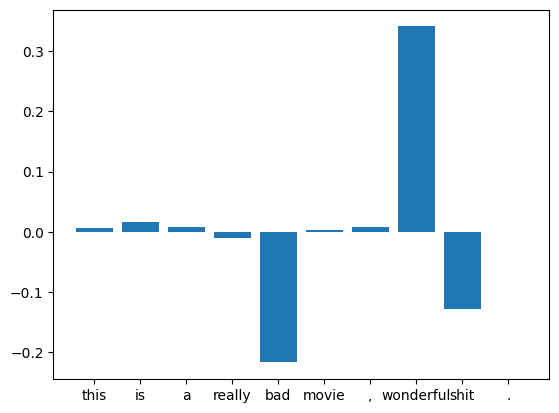

In [18]:
import matplotlib.pyplot as plt

from interpret import feature_occlusion
from utilities import sentence_split, text_2_encoding, SENTENCE_MAXLEN

sentence = '''
This is a really bad movie, wonderful, shit. 
'''
input_vec = text_2_encoding(sentence, word2index, vocabulary_vectors, length_limit=SENTENCE_MAXLEN)
input_vec = torch.as_tensor([input_vec], dtype=torch.float32, device="cuda")
output = model(input_vec)
print("Output:", output.item())
heatmap = feature_occlusion(model, input_vec)
words = sentence_split(sentence)
length = min(len(words), SENTENCE_MAXLEN)
plt.bar(words[:length], heatmap[:length])
plt.show()